<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [43]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [45]:
## Write your code here
print(df.dtypes)
print(df.info())
print(df.describe())

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [46]:
## Write your code here
print(df.isnull().sum())
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].mean())
df["Employment"].fillna("Unknown", inplace=True)
df["RemoteWork"].fillna("Unknown", inplace=True)
df = df.dropna(subset=["JobSat", "YearsCodePro"])
df["YearsCodePro"] = df["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years": 51})
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


/tmp/ipykernel_300/1351407407.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Employment"].fillna("Unknown", inplace=True)
/tmp/ipykernel_300/1351407407.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [47]:
## Write your code here
print("Employment:\n{}".format(df["Employment"].value_counts()))
print("\nJob Satisfaction:\n{}".format(df["JobSat"].value_counts()))
print("\nCoding Experience:\n{}".format(df["YearsCodePro"].value_counts()))

Employment:
Employment
Employed, full-time                                                                                                               21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           2231
Independent contractor, freelancer, or self-employed                                                                               1242
Employed, part-time                                                                                                                 531
Employed, full-time;Student, part-time                                                                                              488
                                                                                                                                  ...  
Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time                     1
Student, full-time;Not em

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


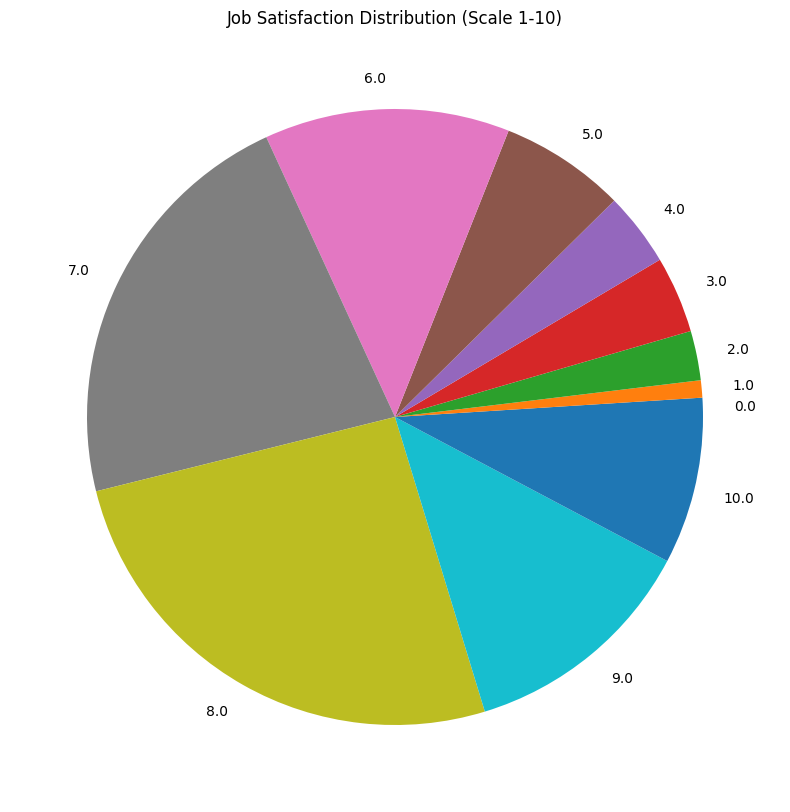

In [48]:
## Write your code here
jobsat = df["JobSat"].value_counts().sort_index()
plt.figure(figsize=(10, 10))
plt.pie(jobsat, labels=jobsat.index)
plt.title("Job Satisfaction Distribution (Scale 1-10)")
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


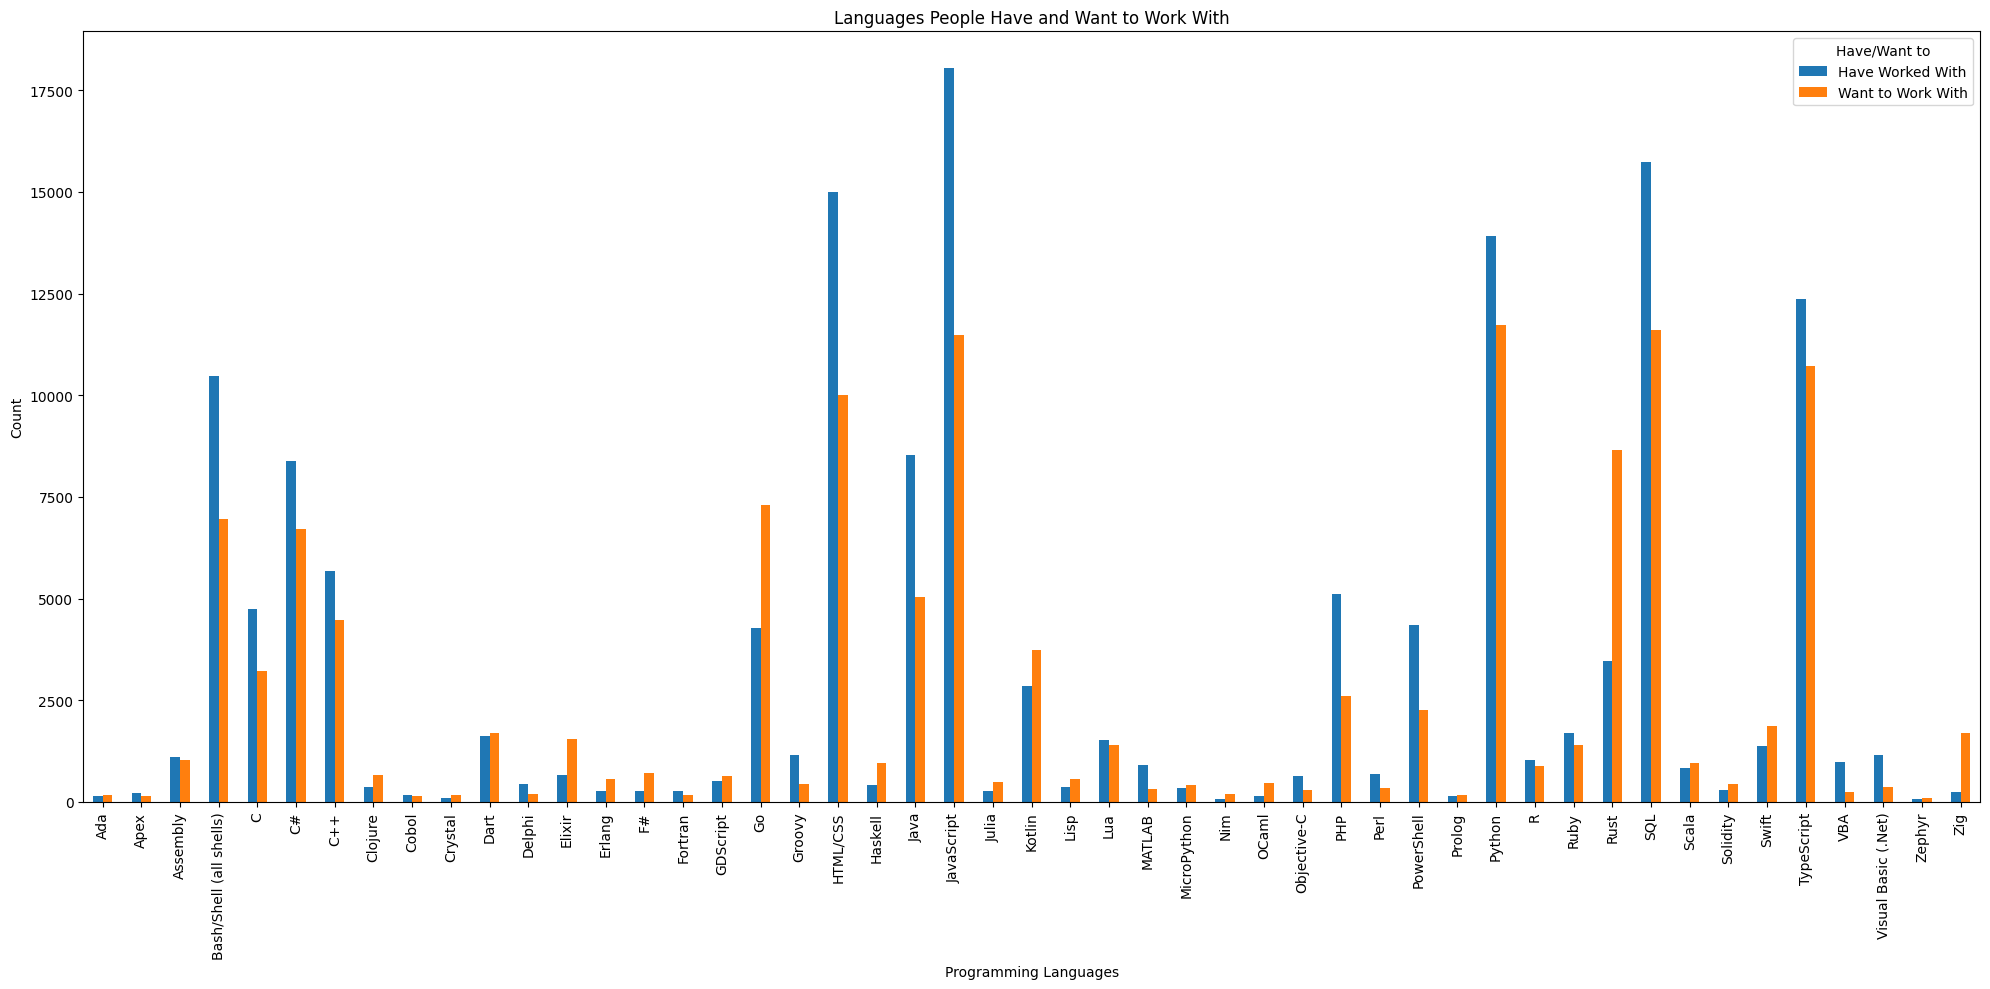

In [49]:
## Write your code here
hww = df["LanguageHaveWorkedWith"].dropna().str.split(';').explode()
www = df["LanguageWantToWorkWith"].dropna().str.split(';').explode()
hww_counts = hww.value_counts()
www_counts = www.value_counts()
ww = pd.DataFrame({
    "Have Worked With": hww_counts,
    "Want to Work With": www_counts
}).fillna(0)

ww.plot(kind='bar', figsize=(20, 10))
plt.title("Languages People Have and Want to Work With")
plt.xlabel("Programming Languages")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Have/Want to")
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 2000x1000 with 0 Axes>

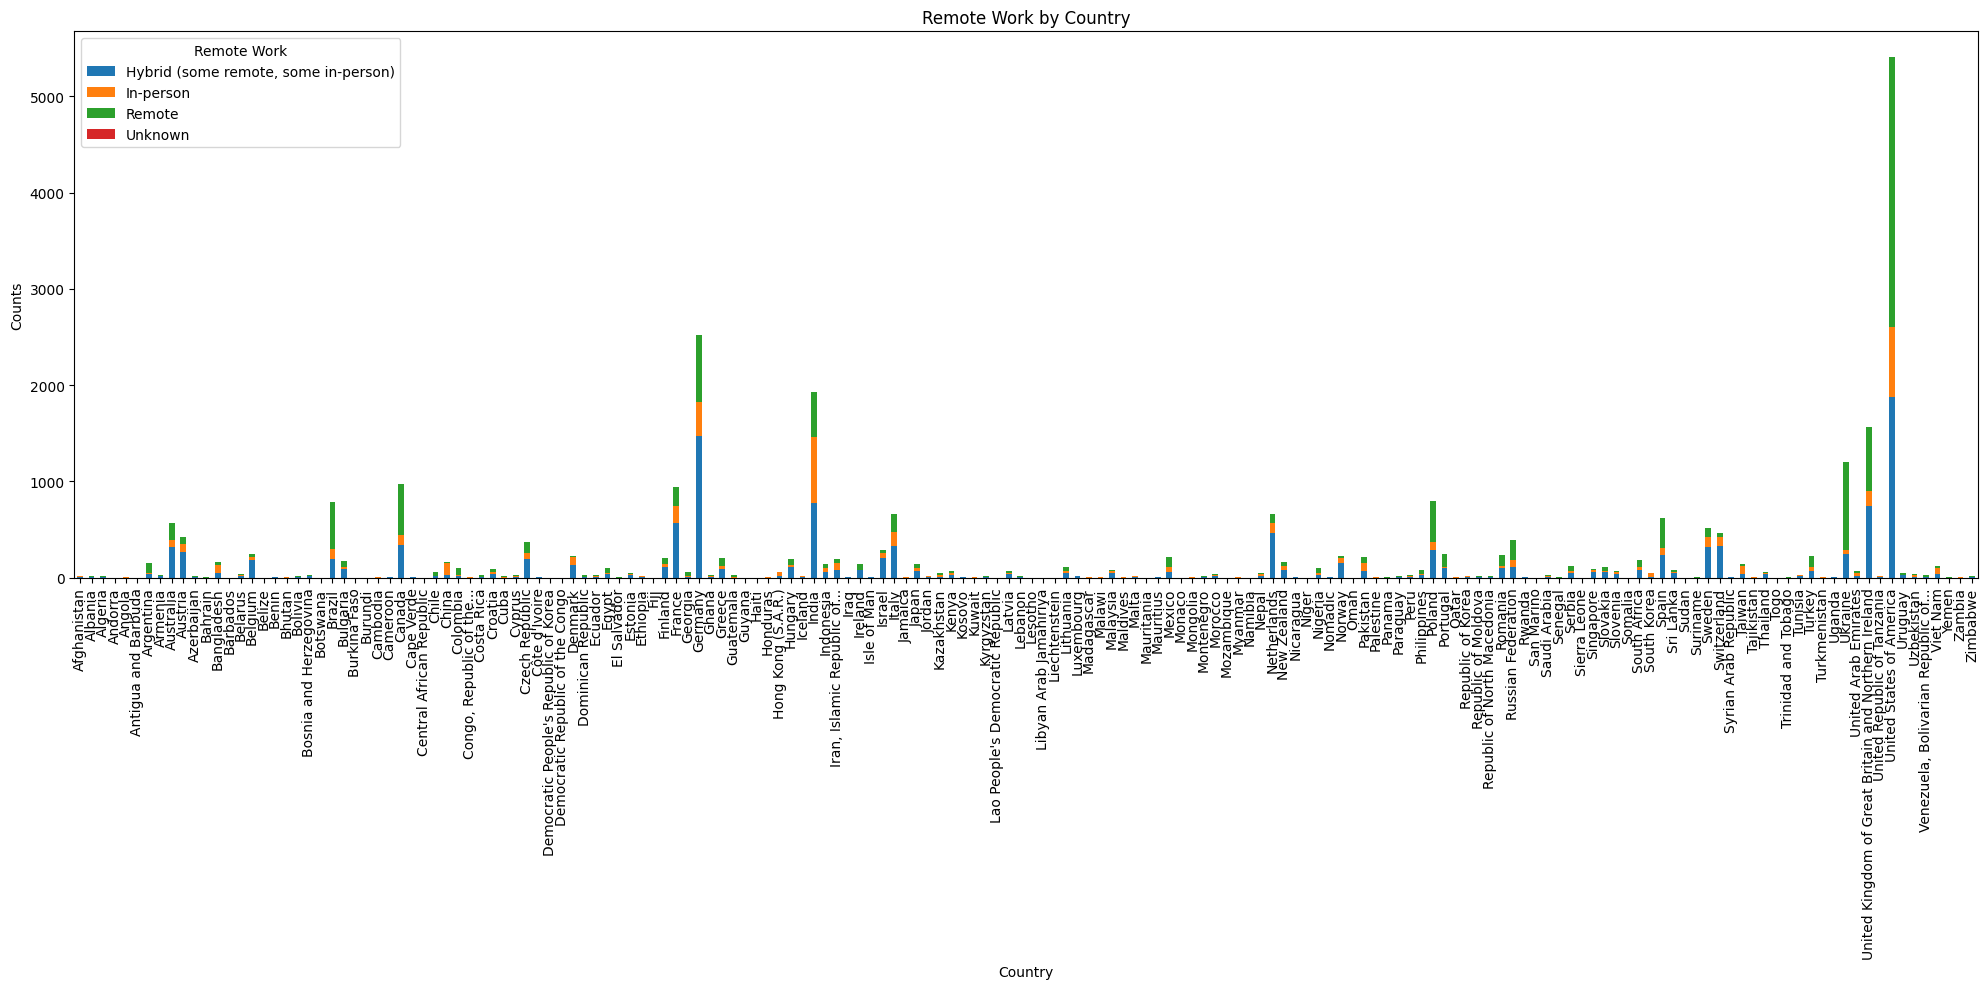

In [50]:
## Write your code here
rw_counts = df.groupby(["Country", "RemoteWork"]).size().unstack()
rw_counts = rw_counts.fillna(0)

plt.figure(figsize=(20, 10))
rw_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title("Remote Work by Country")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.legend(title="Remote Work")
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [51]:
## Write your code here
!pip install scipy
from scipy.stats import pearsonr, spearmanr

print("Pearson: {}".format(pearsonr(df["JobSat"], df["YearsCodePro"]).statistic))
print("Spearman: {}".format(spearmanr(df["JobSat"], df["YearsCodePro"]).statistic))

Pearson: 0.10415320964659901
Spearman: 0.1192006740902708


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


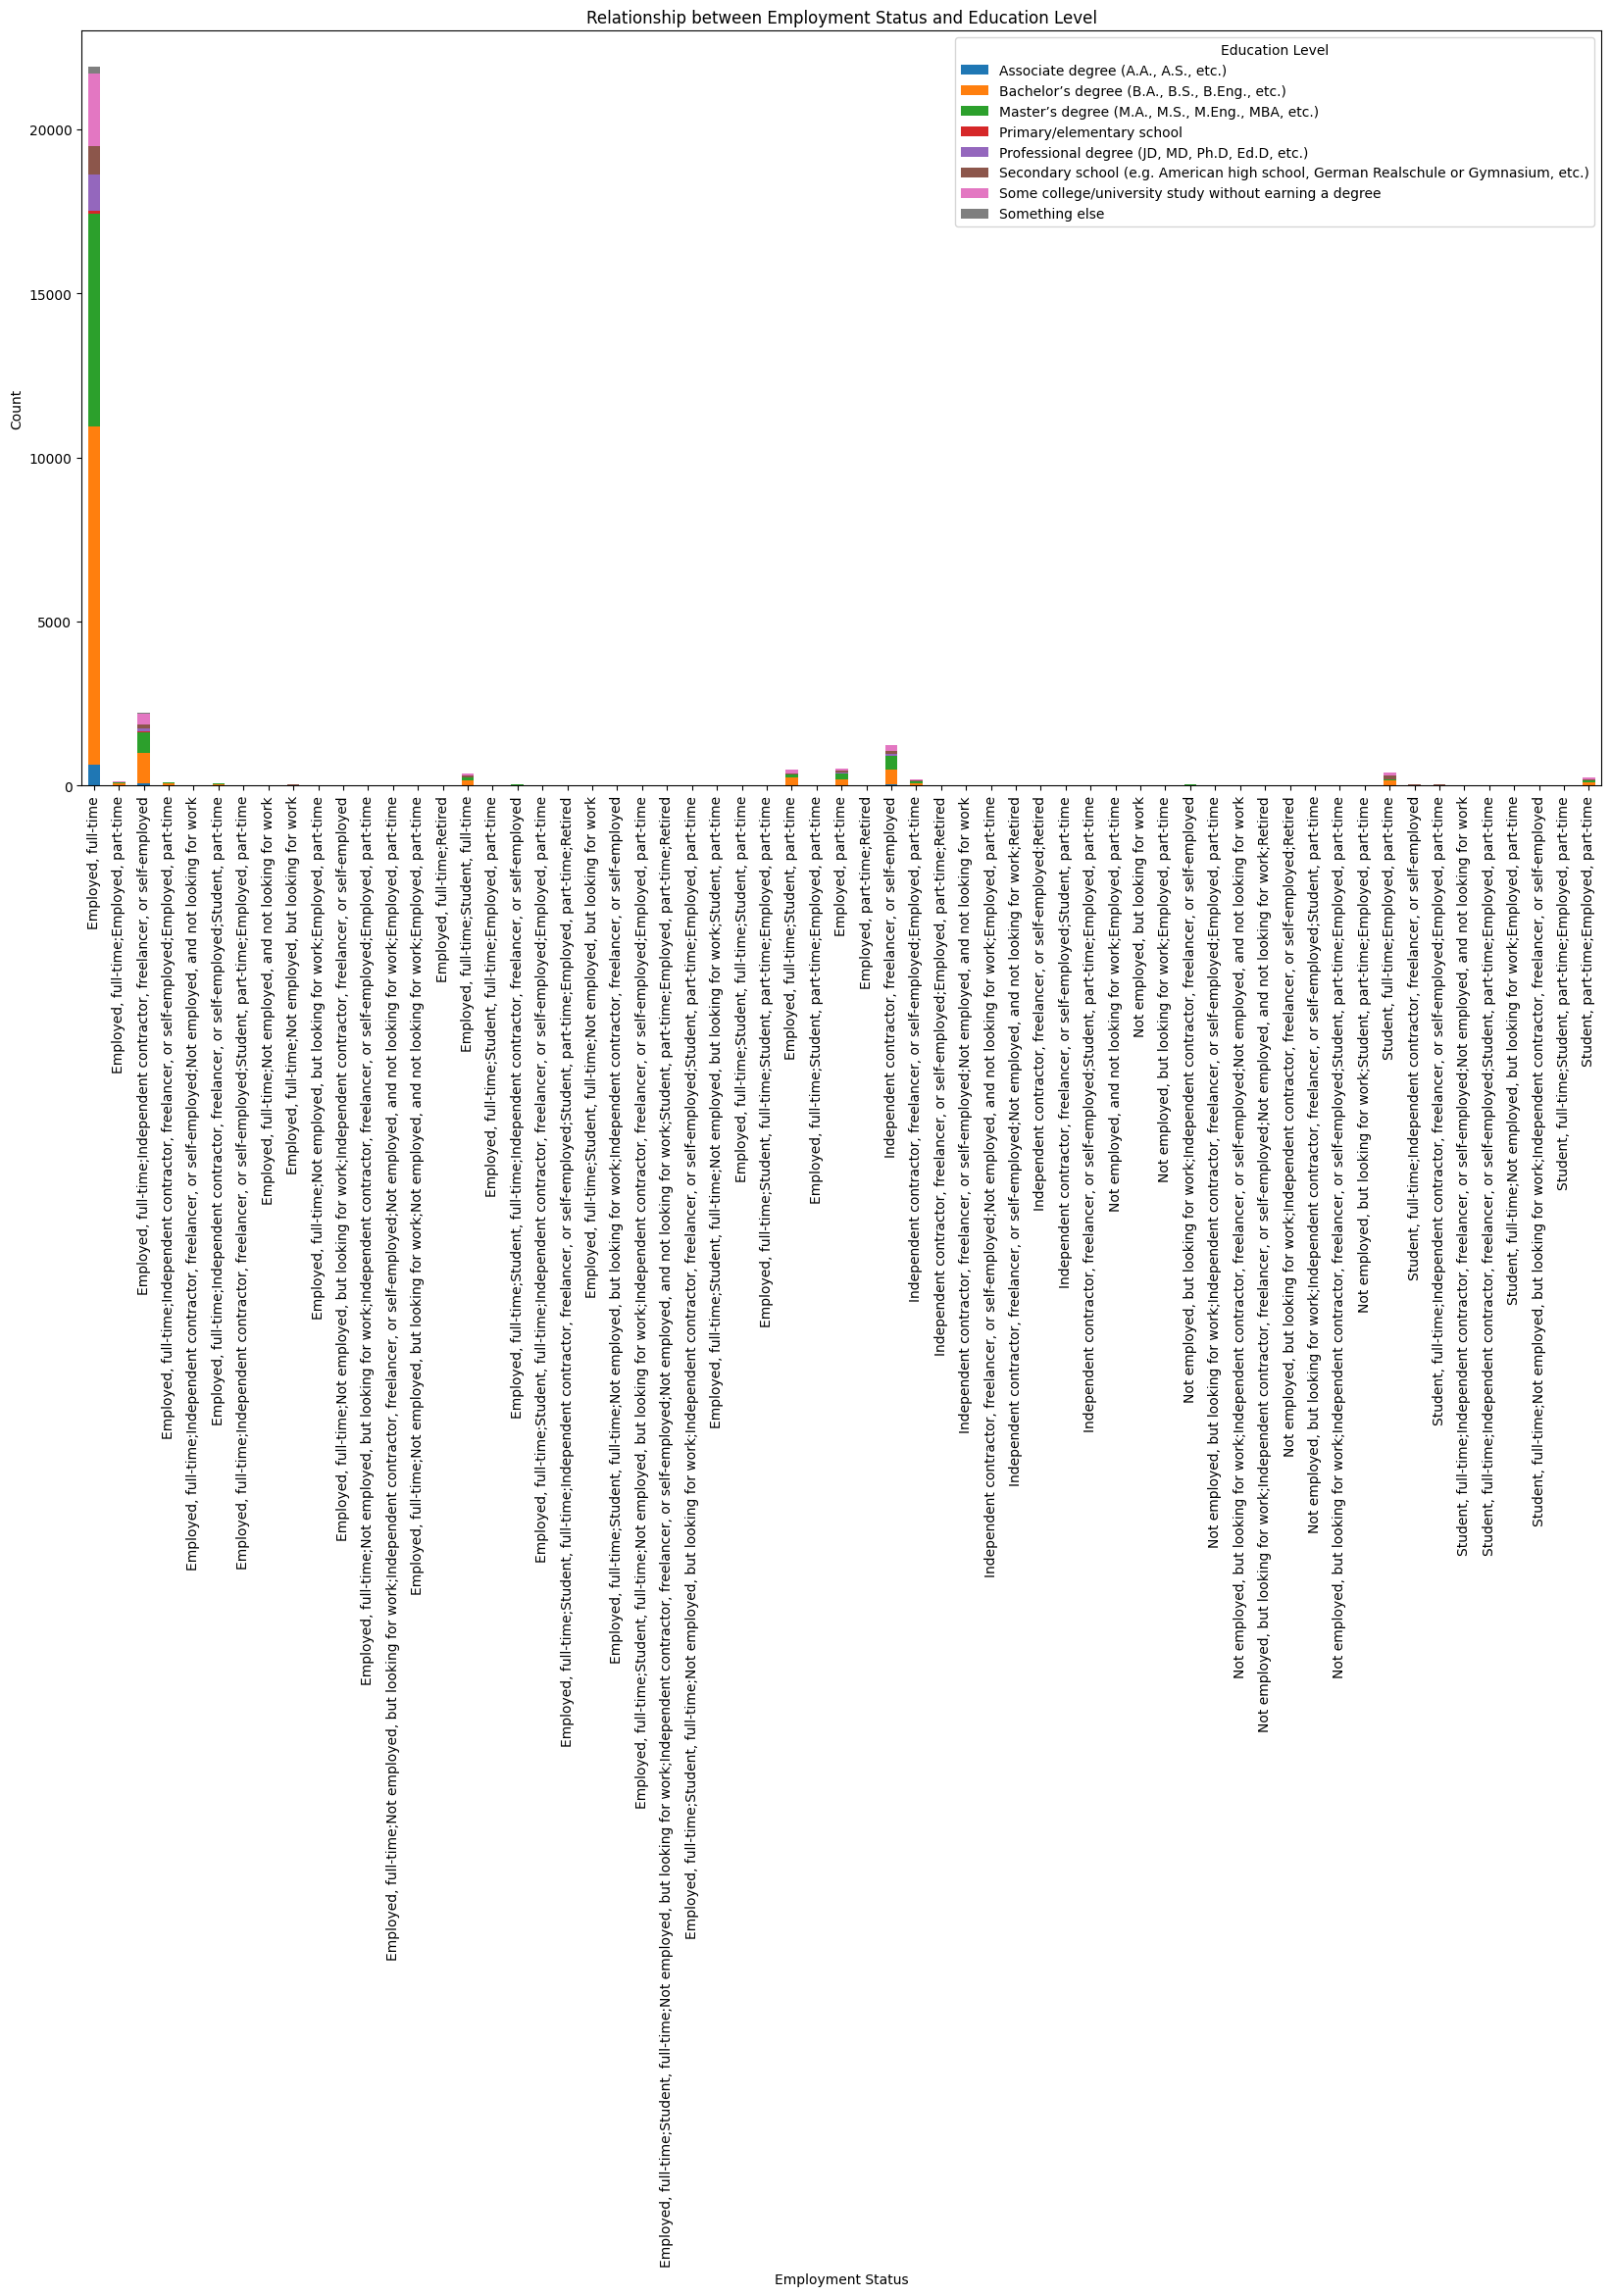

In [53]:
## Write your code here
cross_tab = pd.crosstab(df["Employment"], df["EdLevel"])

cross_tab.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Relationship between Employment Status and Education Level")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Education Level")
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv("Survey_Data_Cleaned13.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
